In [1]:
  %pip install coinmetrics-api-client -q

In [2]:
from google.colab import userdata
import pandas as pd
api_key = userdata.get('api_key')

In [3]:
from coinmetrics.api_client import CoinMetricsClient

client = CoinMetricsClient(api_key)


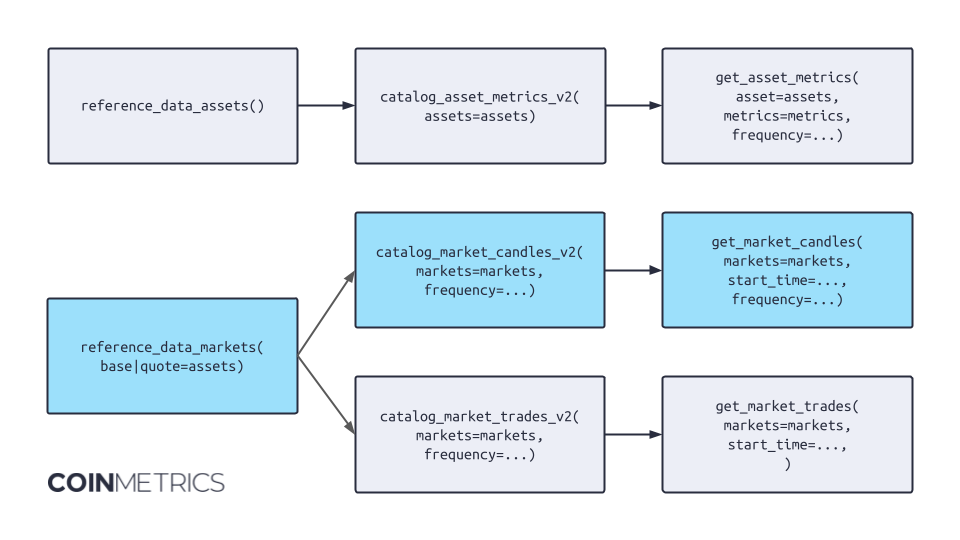

In [4]:
markets = client.reference_data_markets().to_dataframe()

In [5]:
liquidation_catalog = client.catalog_market_liquidations_v2().to_dataframe().merge(markets, how='inner')
liquidation_catalog

,market,min_time,max_time,exchange,type,base,quote,pair,pool_config_id,contract_address,...,status,strike,option_contract_type,is_european,order_taker_fee,order_maker_fee,multiplier_size,margin_trading_enabled,settlement_price,fee
0,binance-1000000MOGUSDT-future,2024-11-07 12:30:44.444000+00:00,2025-04-07 08:35:01.650000+00:00,binance,future,000mog,usdt,000mog-usdt,<NA>,NaN,...,NaN,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,binance-1000BONKUSDC-future,2024-05-02 08:41:05.465000+00:00,2025-04-07 07:11:57.190000+00:00,binance,future,bonk,usdc,bonk-usdc,<NA>,NaN,...,NaN,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,binance-1000BONKUSDT-future,2023-11-22 14:00:48.911000+00:00,2025-04-07 10:17:14.452000+00:00,binance,future,bonk,usdt,bonk-usdt,<NA>,NaN,...,NaN,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,binance-1000BTTCUSDT-future,2022-01-26 03:46:28.290000+00:00,2022-04-11 03:40:00.193000+00:00,binance,future,1000bttc,usdt,1000bttc-usdt,<NA>,NaN,...,NaN,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,binance-1000CATUSDT-future,2024-10-21 12:33:58.582000+00:00,2025-04-07 08:43:09.333000+00:00,binance,future,cat,usdt,cat-usdt,<NA>,NaN,...,NaN,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11315,okex-ZIL-USDT-SWAP-future,2020-10-01 10:21:32.887000+00:00,2025-04-07 09:40:24.922000+00:00,okex,future,zil,usdt,zil-usdt,<NA>,NaN,...,online,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11316,okex-ZK-USDT-SWAP-future,2024-03-19 10:26:53.067000+00:00,2025-04-07 10:15:25.635000+00:00,okex,future,zk,usdt,zk-usdt,<NA>,NaN,...,online,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11317,okex-ZKJ-USDT-SWAP-future,2024-12-06 10:38:37.998000+00:00,2025-04-07 06:54:36.219000+00:00,okex,future,zkj,usdt,zkj-usdt,<NA>,NaN,...,online,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
11318,okex-ZRO-USDT-SWAP-future,2024-06-20 12:26:34.951000+00:00,2025-04-07 10:16:58.591000+00:00,okex,future,zro,usdt,zro-usdt,<NA>,NaN,...,online,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [6]:
s = liquidation_catalog.loc[liquidation_catalog.max_time>'2025-04-01'].groupby(['type', 'exchange'], observed=True).size().rename('count')
s

type    exchange
future  binance     479
        bitfinex     58
        bitmex      134
        bybit       593
        deribit      29
        dydx        124
        huobi       211
        kraken      299
        okex        306
Name: count, dtype: int64

In [7]:
my_markets = liquidation_catalog.loc[
    (liquidation_catalog.max_time>'2025-04-01') &
    (liquidation_catalog.base.isin(['btc', 'eth'])) &
    (liquidation_catalog.quote.isin(['usd', 'usdt'])) &
    (liquidation_catalog.expiration.isna())
    , 'market'].reset_index(drop=True)
my_markets

,market
0,binance-BTCUSDT-future
1,binance-BTCUSD_PERP-future
2,binance-ETHUSDT-future
3,binance-ETHUSD_PERP-future
4,bitfinex-tBTCF0:USTF0-future
5,bitfinex-tETHF0:USTF0-future
6,bitmex-ETHUSD-future
7,bitmex-ETHUSDT-future
8,bitmex-XBTUSD-future
9,bitmex-XBTUSDT-future


In [8]:
start_time = (pd.Timestamp.now() - pd.Timedelta(days=14)).isoformat()

params = dict(
    markets=list(my_markets),
    start_time = start_time,
)

b = client.get_market_liquidations(**params).to_dataframe().set_index('time')
b

,market,coin_metrics_id,amount,price,type,database_time,side
time,,,,,,,
2025-03-24 10:38:50.076000+00:00,binance-BTCUSDT-future,1742812730076000000,0.088,87600.1,trade,2025-03-24 10:38:50.295310+00:00,buy
2025-03-24 10:38:51.082000+00:00,binance-BTCUSDT-future,1742812731082000000,0.002,87632.0,trade,2025-03-24 10:38:52.263144+00:00,buy
2025-03-24 10:38:52.097000+00:00,binance-BTCUSDT-future,1742812732097000000,0.002,87615.1,trade,2025-03-24 10:38:53.575421+00:00,buy
2025-03-24 10:38:53.497000+00:00,binance-BTCUSDT-future,1742812733497000000,0.255,87601.1,trade,2025-03-24 10:38:54.711420+00:00,buy
2025-03-24 10:38:57.031000+00:00,binance-BTCUSDT-future,1742812737031000000,0.138,87628.9,trade,2025-03-24 10:38:57.243804+00:00,buy
...,...,...,...,...,...,...,...
2025-04-07 10:38:30.471000+00:00,okex-ETH-USDT-SWAP-future,17440223104711506431018,10.18,1506.43,order,2025-04-07 10:38:32.225329+00:00,buy
2025-04-07 10:38:31.557000+00:00,okex-ETH-USDT-SWAP-future,1744022311557150693888,8.88,1506.93,order,2025-04-07 10:38:32.922437+00:00,buy
2025-04-07 10:38:33.636000+00:00,okex-ETH-USDT-SWAP-future,17440223136361501183868,38.68,1501.18,order,2025-04-07 10:38:34.771140+00:00,buy


In [9]:
c = client.get_market_metrics(
    markets=list(my_markets),
    start_time = start_time,
    metrics = ['liquidations_reported_future_buy_usd_1h', 'liquidations_reported_future_sell_usd_1h'],
    frequency='1h'
).to_dataframe()
c

,market,time,liquidations_reported_future_buy_usd_1h,liquidations_reported_future_sell_usd_1h
0,binance-BTCUSDT-future,2025-03-24 11:00:00+00:00,224008.85266,3151.71468
1,binance-BTCUSDT-future,2025-03-24 12:00:00+00:00,10521.66464,94182.08466
2,binance-BTCUSDT-future,2025-03-24 13:00:00+00:00,200013.14095,55624.25174
3,binance-BTCUSDT-future,2025-03-24 14:00:00+00:00,918233.2698,221459.77041
4,binance-BTCUSDT-future,2025-03-24 15:00:00+00:00,155517.48623,309947.51193
...,...,...,...,...
4583,okex-ETH-USDT-SWAP-future,2025-04-07 05:00:00+00:00,167579.18592,302099.06911
4584,okex-ETH-USDT-SWAP-future,2025-04-07 06:00:00+00:00,808471.67161,2821110.24147
4585,okex-ETH-USDT-SWAP-future,2025-04-07 07:00:00+00:00,1385532.58349,998711.74449
4586,okex-ETH-USDT-SWAP-future,2025-04-07 08:00:00+00:00,1489782.68083,589894.34838


In [10]:
liquidations_df = c.loc[c.market=='binance-BTCUSD_PERP-future']
liquidations_df.loc[:, 'time'] = liquidations_df.time.apply(pd.to_datetime)


liquidations_df.loc[:, 'liquidations_reported_future_sell_usd_1h'] = liquidations_df['liquidations_reported_future_sell_usd_1h'] * -1


In [11]:
liquidations_df

,market,time,liquidations_reported_future_buy_usd_1h,liquidations_reported_future_sell_usd_1h
335,binance-BTCUSD_PERP-future,2025-03-24 12:00:00+00:00,<NA>,-350200.0
336,binance-BTCUSD_PERP-future,2025-03-24 13:00:00+00:00,2800.0,-5500.0
337,binance-BTCUSD_PERP-future,2025-03-24 14:00:00+00:00,162900.0,-13300.0
338,binance-BTCUSD_PERP-future,2025-03-24 15:00:00+00:00,<NA>,-3100.0
339,binance-BTCUSD_PERP-future,2025-03-24 16:00:00+00:00,<NA>,-5900.0
...,...,...,...,...
556,binance-BTCUSD_PERP-future,2025-04-07 05:00:00+00:00,462400.0,-11700.0
557,binance-BTCUSD_PERP-future,2025-04-07 06:00:00+00:00,68800.0,-3095200.0
558,binance-BTCUSD_PERP-future,2025-04-07 07:00:00+00:00,500.0,-105900.0
559,binance-BTCUSD_PERP-future,2025-04-07 08:00:00+00:00,244100.0,-1300.0


In [12]:
import plotly.express as px

fig = px.bar(
    liquidations_df,
    x="time",
    y=["liquidations_reported_future_buy_usd_1h", "liquidations_reported_future_sell_usd_1h"],
    title="Liquidations (1h) binance-BTCUSD-PERP-future only",
    labels={
        "time": "Time",
        "value": "Liquidation Value (USD)",
    },
    barmode='relative'
)

fig.show()


In [15]:
d = client.get_pair_metrics(
    pairs='eth-usd',
    start_time = start_time,
    metrics = ['liquidations_reported_future_buy_usd_1h', 'liquidations_reported_future_sell_usd_1h'],
    frequency='1h'
).to_dataframe()
d

,pair,time,liquidations_reported_future_buy_usd_1h,liquidations_reported_future_sell_usd_1h
0,eth-usd,2025-03-24 11:00:00+00:00,8419.0,<NA>
1,eth-usd,2025-03-24 12:00:00+00:00,<NA>,5301.0
2,eth-usd,2025-03-24 14:00:00+00:00,29179.435643,16048.0
3,eth-usd,2025-03-24 15:00:00+00:00,7918.459563,<NA>
4,eth-usd,2025-03-24 16:00:00+00:00,<NA>,18628.2754
...,...,...,...,...
250,eth-usd,2025-04-07 05:00:00+00:00,796.0,11349.235
251,eth-usd,2025-04-07 06:00:00+00:00,227735.983424,14397445.935472
252,eth-usd,2025-04-07 07:00:00+00:00,56368.68174,32281.54147
253,eth-usd,2025-04-07 08:00:00+00:00,370533.205513,95.0


In [16]:
liquidations_df = d.loc[d.pair=='eth-usd']
liquidations_df.loc[:, 'time'] = liquidations_df.time.apply(pd.to_datetime)

liquidations_df.loc[:, 'liquidations_reported_future_sell_usd_1h'] = liquidations_df['liquidations_reported_future_sell_usd_1h'] * -1


fig1 = px.bar(
    liquidations_df,
    x="time",
    y=["liquidations_reported_future_buy_usd_1h", "liquidations_reported_future_sell_usd_1h"],
    title="Liquidations (1h)",
    labels={
        "time": "Time",
        "value": "Liquidation Value (USD)",
    },
    barmode='relative'
)

fig1.show()


In [17]:
pair_candles = client.get_pair_candles(
    pairs='eth-usd',
    start_time = start_time,
    frequency='1h'
).to_dataframe()
pair_candles

,pair,time,price_open,price_close,price_high,price_low
0,eth-usd,2025-03-24 11:00:00+00:00,2094.4,2092.86,2104.21,2087.89
1,eth-usd,2025-03-24 12:00:00+00:00,2093.0,2083.96,2095.33,2078.97
2,eth-usd,2025-03-24 13:00:00+00:00,2083.96,2082.46,2087.68,2073.59
3,eth-usd,2025-03-24 14:00:00+00:00,2082.46,2080.88,2102.0,2077.93
4,eth-usd,2025-03-24 15:00:00+00:00,2081.28,2089.44,2090.81,2075.74
...,...,...,...,...,...,...
330,eth-usd,2025-04-07 05:00:00+00:00,1547.1,1539.5,1559.91,1535.8
331,eth-usd,2025-04-07 06:00:00+00:00,1539.29,1429.82,1551.43,1411.42
332,eth-usd,2025-04-07 07:00:00+00:00,1429.42,1458.83,1475.63,1429.42
333,eth-usd,2025-04-07 08:00:00+00:00,1458.97,1494.93,1510.03,1454.14


In [18]:
import plotly.graph_objects as go

# Rename columns
pair_candles = pair_candles.rename(columns={
    'price_open': 'open',
    'price_close': 'close',
    'price_high': 'high',
    'price_low': 'low',

})

# Create the candlestick chart
fig2 = go.Figure(data=[go.Candlestick(
    x=pair_candles['time'],
    open=pair_candles['open'],
    high=pair_candles['high'],
    low=pair_candles['low'],
    close=pair_candles['close'],
)])

fig2.update_layout(title='ETH-USD Candlestick Chart')
fig2.show()


In [19]:
# prompt: Plot fig 1 and fig 2 on top of each other.

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots and mention plot grid
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                   vertical_spacing=0.03, subplot_titles=('ETH-USD Liquidations (1h)', 'ETH-USD Candlestick Chart'),
                   row_width=[0.2, 0.7])


# Add traces
fig.add_trace(go.Bar(x=liquidations_df['time'],
                     y=liquidations_df['liquidations_reported_future_sell_usd_1h'],
                     name='Sell', marker_color='#ff6f69'), row=1, col=1)
fig.add_trace(go.Bar(x=liquidations_df['time'],
                     y=liquidations_df['liquidations_reported_future_buy_usd_1h'],
                     name='Buy', marker_color='#20c997'), row=1, col=1)
fig.add_trace(go.Candlestick(x=pair_candles['time'],
                open=pair_candles['open'],
                high=pair_candles['high'],
                low=pair_candles['low'],
                close=pair_candles['close']), row=2, col=1)


# Update layout
fig.update_layout(title_text="Liquidations and Candlestick Chart", height=800, barmode='relative', showlegend=True)
fig.update_xaxes(title_text="Time", rangeslider_visible=False, row=1, col=1)
fig.update_xaxes(title_text="Time", rangeslider_visible=False, row=2, col=1)
fig.update_yaxes(title_text="Liquidation Value (USD)", row=1, col=1)
fig.update_yaxes(title_text="Price (USD)", row=2, col=1)

fig.show()
